In [101]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [102]:
def create_data():
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            training_data.append([img_array, category_index])
    return training_data

In [103]:
training_data = create_data()

In [104]:
import random

# to mix the data
random.shuffle(training_data)

In [105]:
X = [] # the X_training
Y = [] # the Y_training

In [106]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [107]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(651, 224, 224)
(651,)


Since X.shape[0] == Y.shape[0] we are done

In [108]:
import tensorflow as tf
X = tf.keras.utils.normalize(X, axis=1) # Normalize data

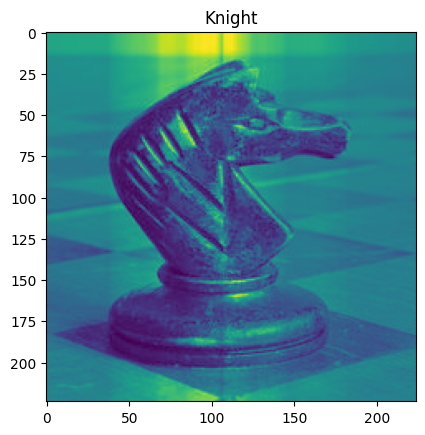

In [109]:
index_test = 9
plt.imshow(X[index_test])
plt.title(CATEGORIES[Y[index_test]])
plt.show()

In [110]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [111]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2383 - loss: 1.9033
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2844 - loss: 1.7097
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.2973 - loss: 1.5651
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3321 - loss: 1.5153
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3079 - loss: 1.5667
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3140 - loss: 1.6300
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3241 - loss: 1.5026
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.3166 - loss: 1.4998
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3562 - loss: 1.4700
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4347 - loss: 1.3778
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3615 - loss: 1.4789
Epoch 12/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step

In [ ]:
val_acc, val_loss = model.evaluate(X_train, Y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9659 - loss: 0.1037


In [115]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


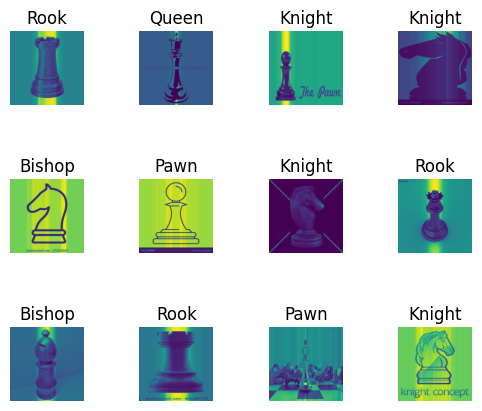

In [121]:
x = 20
y = x+12
# printing some pictures of the x_test and it's predictions as title
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(CATEGORIES[np.argmax(predictions[i])])
plt.show()